# Image recognition on the Fashion MNIST dataset

Instead of classifying ten digits, let's try a slightly harder example: Classifying black-and-white images of fashion items. This dataset is known as the ["Fashion MNIST" dataset](https://keras.io/api/datasets/fashion_mnist/), due to its similarity to the original MNIST data.

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt

c:\Users\Simon\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Simon\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Simon\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

## Load the data
The dataset contains 60 000 training images and 10 000 testing images, from 10 different categories:

| Label | Description |
| ----- | ----- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Scale the images to the [0, 1] interval
X_train = X_train.astype("float32") / 255.
X_test = X_test.astype("float32") / 255.

# Add the "channel" dimension
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


If we look at the target values in `y_train`, we see that these have labels 0-9:

In [4]:
print(y_train.shape)
print(y_train[:5])

(60000,)
[9 0 0 3 0]


But, we rather want them to be _categorical_: instead of 
```
y_train[0] -> 9
```
we want 
```
y_train[0] -> [0 0 0 0 0 0 0 0 0 1]
```

### <span style="color: red;">Exercise:<span>
Convert the labels to categorical format, using the function `keras.utils.to_categorical`.

In [5]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

Now, let's get the image shape (width and height) by checking the first image:

In [6]:
image_shape = X_train[0].shape
print(image_shape)

(28, 28, 1)


Define the class names from the table above:

In [7]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

Plot the first few images.

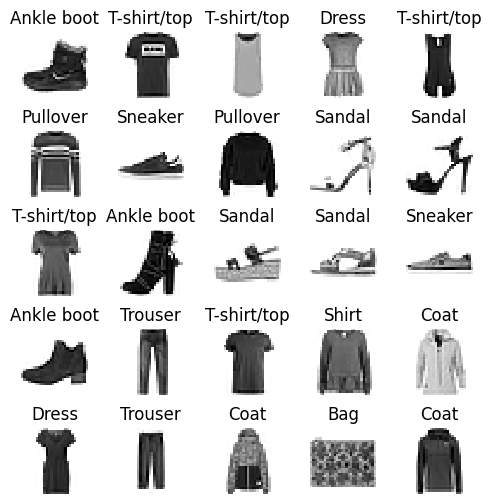

In [8]:
n_rows = 5
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[np.argmax(y_train[index])])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

### <span style="color: red;">Exercise:<span>
Create a neural network yourself, using the Keras API.

In [13]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=image_shape),
        keras.layers.Flatten(input_shape=[28,28]),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ]
)

model.summary()

c:\Users\Simon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,506 (103.54 KB)

 Trainable params: 26,506 (103.54 KB)

 Non-trainable params: 0 (0.00 B)

### Compile and train the network

In [14]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [15]:
batch_size = 128    # How many images to load in a single batch
epochs = 10         # How many times to iterate over the full dataset

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7731 - loss: 0.6657 - val_accuracy: 0.8382 - val_loss: 0.4644
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8455 - loss: 0.4411 - val_accuracy: 0.8507 - val_loss: 0.4193
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8579 - loss: 0.4019 - val_accuracy: 0.8525 - val_loss: 0.4006
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8664 - loss: 0.3773 - val_accuracy: 0.8663 - val_loss: 0.3842
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8700 - loss: 0.3633 - val_accuracy: 0.8643 - val_loss: 0.3797
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8735 - loss: 0.3516 - val_accuracy: 0.8683 - val_loss: 0.3774
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8783 - loss: 0.3369 - val_accuracy: 0.8642 - val_loss: 0.3806
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8823 - loss: 0.3246 - val_accuracy: 0.

### Plot the training performance

Let's plot the training performance as function of epoch number.

First, have a look at the contents of the `history` dictionary:

In [16]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Plot the training and validation loss:

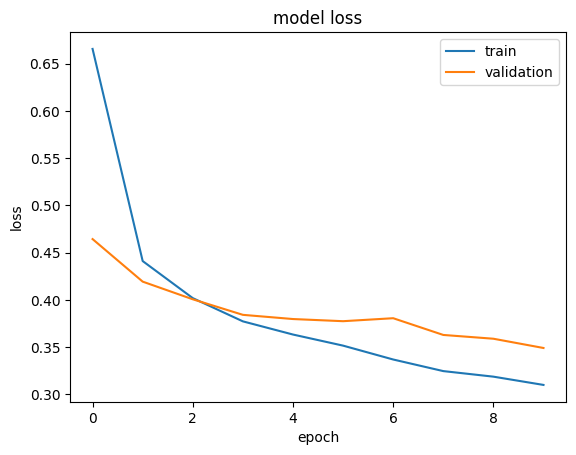

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Plot the accuracy:

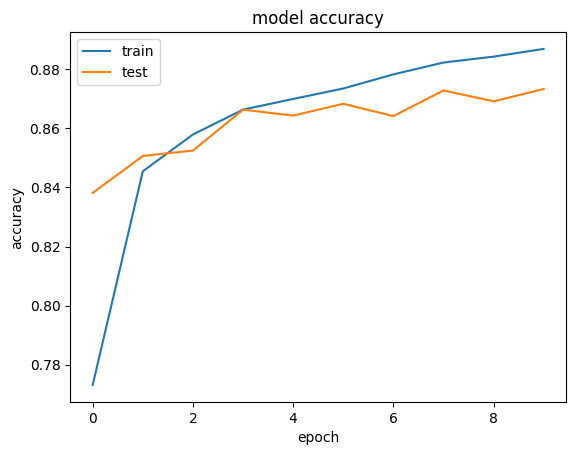

In [18]:

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Evaluate your model on the test data

In [19]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.37046435475349426
Test accuracy: 0.8669000267982483


### <span style="color: red;">Exercise:<span>
Try out different numbers of layers and different numbers of filters, to fint the best possible network. Train for as many epochs as you think is optimal (remember over- and underfitting).